# Reconocimiento Facial

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline 
# Es el sistema que utilizan las consolas de desarrolador para ir encadenando instruciones

In [2]:
# ?fetch_lfw_people
#Load the Labeled Faces in the Wild (LFW) people dataset (classification).

# Download it if necessary.

In [3]:
# Obtener Caras
faces = fetch_lfw_people(min_faces_per_person=15, download_if_missing=False)
# Parámetros usados
#data_home=None Specify another download and cache folder for the datasets. By defaultall scikit-learn data is stored in '~/scikit_learn_data' subfolders.
# funneled=True  Download and use the funneled variant of the dataset.
# resize=0.5 Ratio used to resize the each face picture.
# min_faces_per_person=0 The extracted dataset will only retain pictures of people that have at least `min_faces_per_person` different pictures.
#color=False # Keep the 3 RGB channels instead of averaging them to a single gray level channel. If color is True the shape of the data has
# one more dimension than the shape with color = False.
#slice_=(slice(70, 195, None)Provide a custom 2D slice (height, width) to extract the
#'interesting' part of the jpeg files and avoid use statistical
# correlation from the background
# download_if_missing=True     If False, raise a IOError if the data is not locally available
# instead of trying to download the data from the source site.

In [4]:
faces

{'data': array([[ 55.666668 ,  64.       ,  75.666664 , ..., 248.66667  ,
         249.66667  , 251.66667  ],
        [ 65.666664 ,  38.       ,  25.666666 , ..., 138.66667  ,
         130.66667  , 127.666664 ],
        [ 32.       ,  33.       ,  32.       , ...,  10.333333 ,
          21.666666 ,  62.       ],
        ...,
        [ 73.       ,  78.666664 ,  84.666664 , ...,  73.       ,
          58.       ,  54.666668 ],
        [ 15.333333 ,  11.333333 ,  18.333334 , ...,  91.333336 ,
          58.       ,  19.666666 ],
        [  1.3333334,   2.       ,   3.3333333, ...,  64.333336 ,
          33.666668 ,   6.6666665]], dtype=float32),
 'images': array([[[ 55.666668 ,  64.       ,  75.666664 , ..., 111.666664 ,
          110.       , 110.       ],
         [ 65.666664 ,  74.666664 ,  84.333336 , ..., 115.333336 ,
          113.666664 , 113.       ],
         [ 73.666664 ,  81.       ,  92.       , ..., 119.333336 ,
          116.333336 , 116.       ],
         ...,
         [174.

In [5]:
faces.data.shape,faces.images.shape, 62*47

((523, 2914), (523, 62, 47), 2914)

In [6]:
faces.images[0].shape

(62, 47)

In [7]:
print(faces.target_names)

['George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Igor Ivanov' 'John Howard' 'Michael Schumacher' 'Pervez Musharraf'
 'Tiger Woods']


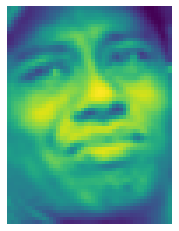

In [8]:
fig = plt.figure(figsize=(4,4))
plt.imshow(faces.images[32])
plt.axis(False)
plt.show()

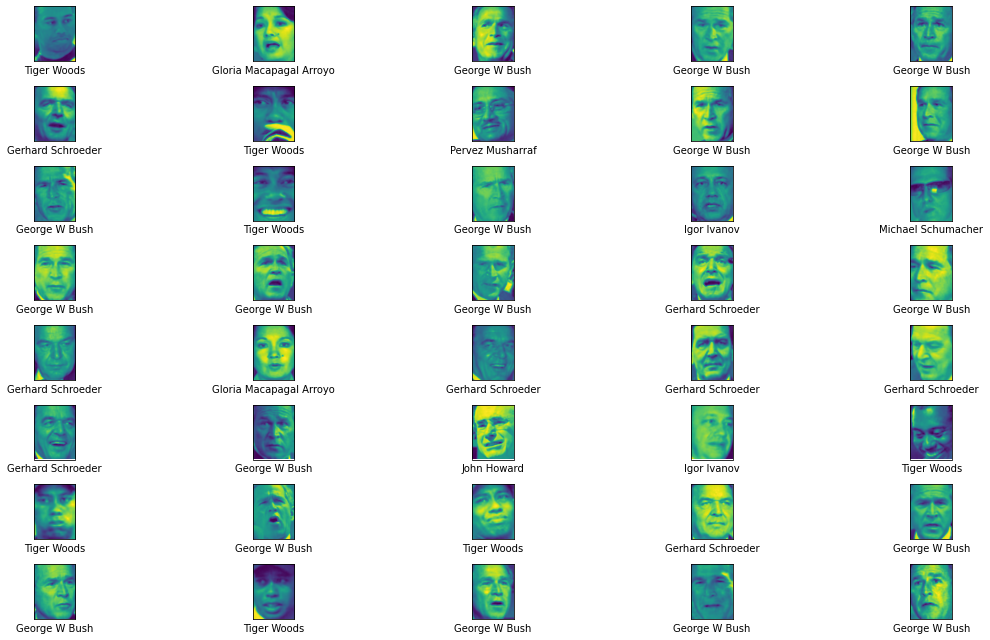

In [9]:
fig, ax = plt.subplots(8,5, figsize = (16,9))
# En este caso ax es un arreglo de 8x5. Si pones ax.flat te pone todos en un solo arreglo

for i, ax_i in enumerate(ax.flat):
    
    ax_i.imshow(faces.images[i])
    
    ax_i.set(xticks = [],yticks = [], xlabel = faces.target_names[faces.target[i]])
    

plt.tight_layout()


In [10]:
len(faces.target_names)

8

In [11]:
np.min(faces.target),np.max(faces.target) # Te da el nombre con ubicación.
# Por ejempo, faces.target[2] = 0, Y para saber quien es checo en faces.target_names[0]

(0, 7)

In [12]:
# ?RandomizedPCA   Antes lo importabas. Ahora está dentro de PCA
# Linear dimensionality reduction using approximated Singular Value
# Decomposition of the data and keeping only the most significant
# singular vectors to project the data to a lower dimensional space.

# Parameterss
# n_components : int, optional
#    Maximum number of components to keep. When not given or None, this
#    is set to n_features (the second dimension of the training data).

# whiten : bool, optional
#    When True (False by default) the `components_` vectors are multiplied
#    by the square root of (n_samples) and divided by the singular values to
#    ensure uncorrelated outputs with unit component-wise variances.

#   Whitening will remove some information from the transformed signal
#    (the relative variance scales of the components) but can sometime
#    improve the predictive accuracy of the downstream estimators by
#    making their data respect some hard-wired assumptions.

In [13]:
?make_pipeline 
# Construct a Pipeline from the given estimators.

In [14]:
?PCA
# Linear dimensionality reduction using Singular Value Decomposition of the
# data to project it to a lower dimensional space. The input data is centered
# but not scaled for each feature before applying the SVD.

In [15]:
pca = PCA(n_components=150, svd_solver="randomized", whiten=True)
pca

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

In [16]:
svc = SVC(kernel="rbf", class_weight="balanced")
svc

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
model = make_pipeline(pca, svc)
model

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [20]:
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((392, 2914), (131, 2914), (392,), (131,))

In [21]:
faces.target.shape

(523,)

In [22]:
faces.data.shape

(523, 2914)

In [23]:
param_grid = {
    "svc__C":[0.1,0.5,1,3,5,10,25,2500,100000],
    "svc__gamma":[0.0001,0.001,0.01,0.1,.1,1,100,1000] # Se pone con doble guión bajo para que se acepte
}  # El parámetr gamma controla el tamaño de la función radial
grid = GridSearchCV(model, param_grid=param_grid)

In [24]:
grid.fit(Xtrain,Ytrain)

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sacel\APython3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=None,
                                            svd_solver='randomized', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=

In [25]:
print(grid.best_params_)

{'svc__C': 2500, 'svc__gamma': 0.001}


In [26]:
grid.best_score_

0.7755102040816326

In [27]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=2500, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [28]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

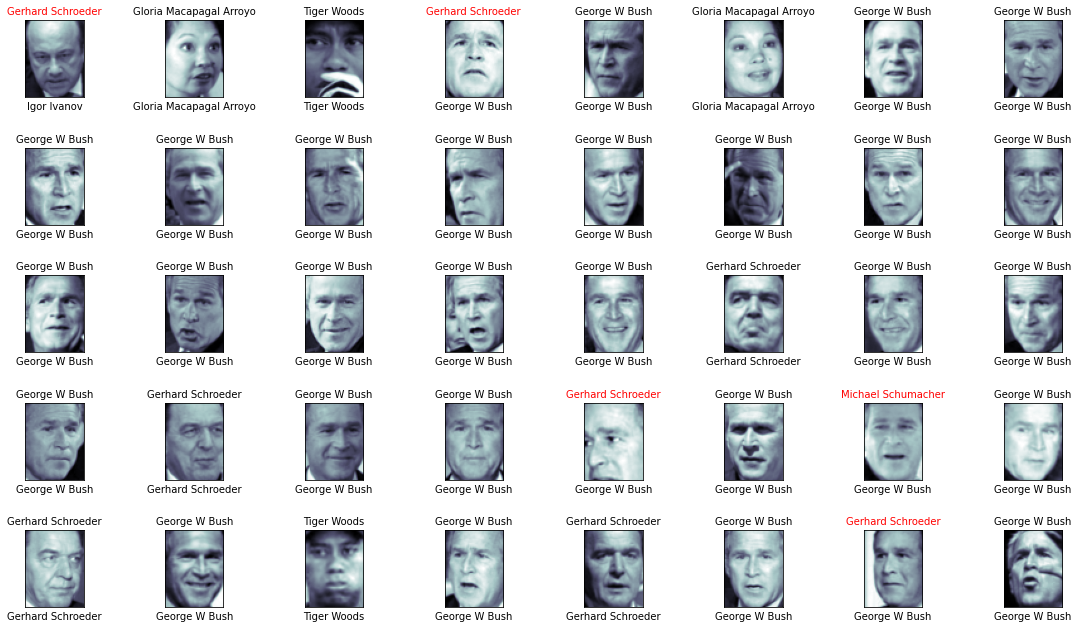

In [29]:
fig, ax = plt.subplots(5,8, figsize = (16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape([faces.images.shape[1],faces.images.shape[2]]), cmap = "bone")
    ax_i.set_xticks([])
    ax_i.set_yticks([])
    ax_i.set_xlabel((faces.target_names[Ytest[i]])+"\n", size = 10)
    ax_i.set_title((faces.target_names[yfit[i]]), size = 10, color = "black" if float(yfit[i])==float(Ytest[i]) else "red")
                  
plt.tight_layout()
plt.subplots_adjust(right=1, left = .05)

In [30]:
from sklearn.metrics import classification_report

In [31]:
# ?classification_report

# Build a text report showing the main classification metrics

In [32]:
print(classification_report(Ytest,yfit, target_names=faces.target_names))

                         precision    recall  f1-score   support

          George W Bush       0.87      0.91      0.89        81
      Gerhard Schroeder       0.70      0.95      0.81        22
Gloria Macapagal Arroyo       1.00      1.00      1.00         5
            Igor Ivanov       1.00      0.25      0.40         4
            John Howard       0.00      0.00      0.00         2
     Michael Schumacher       0.00      0.00      0.00         2
       Pervez Musharraf       1.00      0.40      0.57         5
            Tiger Woods       1.00      0.60      0.75        10

               accuracy                           0.83       131
              macro avg       0.70      0.51      0.55       131
           weighted avg       0.84      0.83      0.82       131



C:\Users\sacel\APython3\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
pd.DataFrame(classification_report(Ytest,yfit, target_names=faces.target_names,output_dict=True)).T

,precision,recall,f1-score,support
George W Bush,0.870588,0.913580,0.891566,81.000000
Gerhard Schroeder,0.700000,0.954545,0.807692,22.000000
Gloria Macapagal Arroyo,1.000000,1.000000,1.000000,5.000000
Igor Ivanov,1.000000,0.250000,0.400000,4.000000
John Howard,0.000000,0.000000,0.000000,2.000000
Michael Schumacher,0.000000,0.000000,0.000000,2.000000
Pervez Musharraf,1.000000,0.400000,0.571429,5.000000
Tiger Woods,1.000000,0.600000,0.750000,10.000000
accuracy,0.832061,0.832061,0.832061,0.832061
macro avg,0.696324,0.514766,0.552586,131.000000


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
?confusion_matrix

In [36]:
len(faces.target_names)

8

In [37]:
# La matriz tiene que ser de 8x8 
conf_mat = pd.DataFrame(confusion_matrix(Ytest,yfit), index = faces.target_names, columns=faces.target_names)
conf_mat

,George W Bush,Gerhard Schroeder,Gloria Macapagal Arroyo,Igor Ivanov,John Howard,Michael Schumacher,Pervez Musharraf,Tiger Woods
George W Bush,74,6,0,0,0,1,0,0
Gerhard Schroeder,1,21,0,0,0,0,0,0
Gloria Macapagal Arroyo,0,0,5,0,0,0,0,0
Igor Ivanov,2,1,0,1,0,0,0,0
John Howard,1,1,0,0,0,0,0,0
Michael Schumacher,1,1,0,0,0,0,0,0
Pervez Musharraf,3,0,0,0,0,0,2,0
Tiger Woods,3,0,0,0,0,1,0,6


In [38]:
77/conf_mat.sum(axis=0)[0],77/conf_mat.sum(axis=1)[0],np.mean([77/conf_mat.sum(axis=0)[0],77/conf_mat.sum(axis=1)[0]])

(0.9058823529411765, 0.9506172839506173, 0.9282498184458969)

In [39]:
import seaborn as sns; sns.set()

C:\Users\sacel\APython3\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


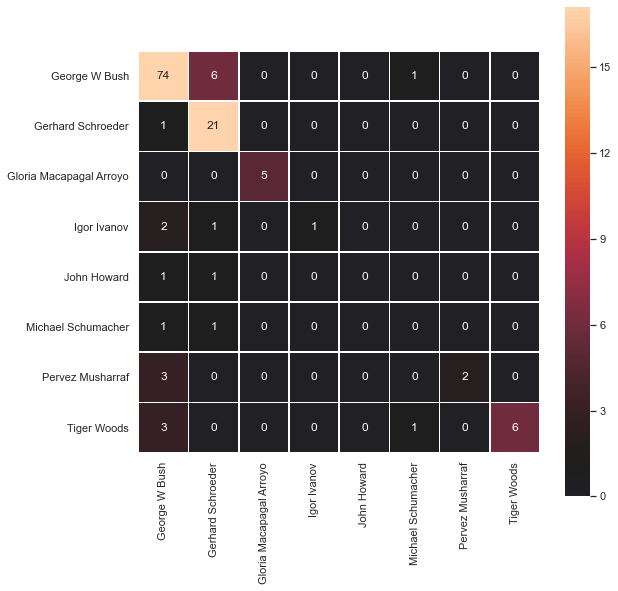

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, square=True, annot=True,fmt = "d", cbar = True, xticklabels=faces.target_names,
           yticklabels=faces.target_names,robust=True,center=True, linewidths=.5)
plt.show()